In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

np.random.seed(42)

### Task # 01

In [15]:
class Perceptron:
    def __init__(self, learning_rate=0.1, max_iter=100):
        self.lr = learning_rate
        self.max_iter = max_iter
        self.weights = None
        
    def fit(self, X, y):
        n_features = X.shape[1]
        # Initialize weights randomly
        self.weights = np.random.uniform(-0.5, 0.5, n_features + 1)
        
        # Add bias column
        X_bias = np.c_[np.ones(X.shape[0]), X]
        
        for epoch in range(self.max_iter):
            errors = 0
            for i in range(len(X)):
                # Calculate output
                z = np.dot(X_bias[i], self.weights)
                prediction = 1 if z >= 0 else 0
                
                # Update weights if wrong
                error = y[i] - prediction
                if error != 0:
                    self.weights += self.lr * error * X_bias[i] 
                    errors += 1
            
            if errors == 0:
                print(f"Converged in {epoch+1} iterations")
                break
        
        return self
    
    def predict(self, X):
        X_bias = np.c_[np.ones(X.shape[0]), X]
        return np.where(np.dot(X_bias, self.weights) >= 0, 1, 0)

In [16]:
# Training data for logic gates
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# Truth tables
y_and = np.array([0, 0, 0, 1])
y_or = np.array([0, 1, 1, 1]) 
y_nand = np.array([1, 1, 1, 0])
y_nor = np.array([1, 0, 0, 0])

print("Training data:")
print("X =", X)
print("AND:", y_and)
print("OR:", y_or)
print("NAND:", y_nand)
print("NOR:", y_nor)

Training data:
X = [[0 0]
 [0 1]
 [1 0]
 [1 1]]
AND: [0 0 0 1]
OR: [0 1 1 1]
NAND: [1 1 1 0]
NOR: [1 0 0 0]


In [17]:
# Function to plot decision boundary
def plot_boundary(X, y, model, title):
    plt.figure(figsize=(8, 6))
    
    # Create mesh for decision boundary
    h = 0.01
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Get predictions for mesh
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(mesh_points)
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['red', 'blue']))
    
    # Plot data points
    colors = ['red', 'blue']
    for i in [0, 1]:
        mask = y == i
        plt.scatter(X[mask, 0], X[mask, 1], c=colors[i], s=100, 
                   label=f'Class {i}', edgecolors='black')
    
    # Add labels to points
    for i in range(len(X)):
        plt.annotate(f'({X[i,0]},{X[i,1]})', (X[i,0], X[i,1]), 
                    xytext=(5, 5), textcoords='offset points', fontsize=9)
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f'{title} Gate')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

Training AND Gate...
Converged in 4 iterations


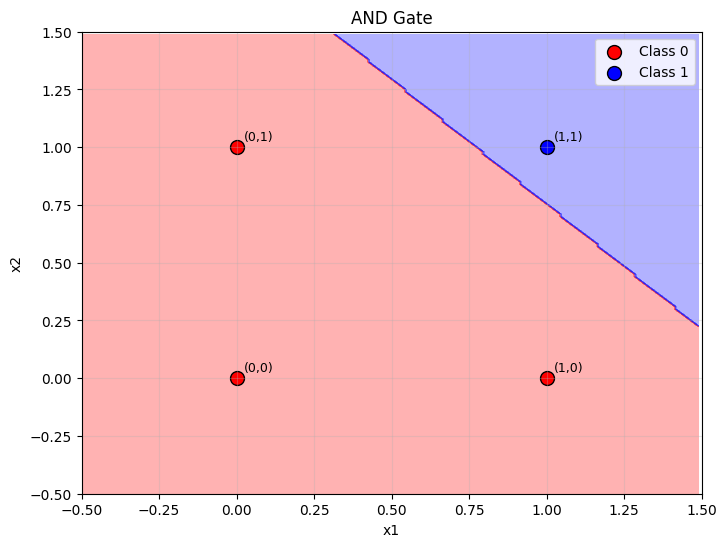

AND Gate Results:
Input: [0 0] -> Expected: 0, Predicted: 0
Input: [0 1] -> Expected: 0, Predicted: 0
Input: [1 0] -> Expected: 0, Predicted: 0
Input: [1 1] -> Expected: 1, Predicted: 1
Weights: [-0.42545988  0.25071431  0.23199394]


In [18]:
# AND Gate
print("Training AND Gate...")
and_model = Perceptron()
and_model.fit(X, y_and)

plot_boundary(X, y_and, and_model, "AND")

# Test the model
predictions = and_model.predict(X)
print("AND Gate Results:")
for i in range(len(X)):
    print(f"Input: {X[i]} -> Expected: {y_and[i]}, Predicted: {predictions[i]}")

print(f"Weights: {and_model.weights}")

Training OR Gate...
Converged in 8 iterations


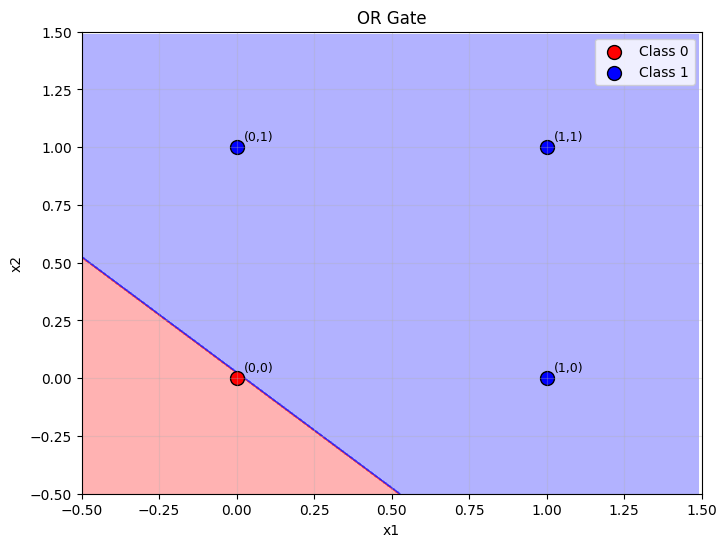

OR Gate Results:
Input: [0 0] -> Expected: 0, Predicted: 0
Input: [0 1] -> Expected: 1, Predicted: 1
Input: [1 0] -> Expected: 1, Predicted: 1
Input: [1 1] -> Expected: 1, Predicted: 1
Weights: [-0.00134152  0.05601864  0.05599452]


In [19]:
# OR Gate
print("Training OR Gate...")
or_model = Perceptron()
or_model.fit(X, y_or)

plot_boundary(X, y_or, or_model, "OR")

predictions = or_model.predict(X)
print("OR Gate Results:")
for i in range(len(X)):
    print(f"Input: {X[i]} -> Expected: {y_or[i]}, Predicted: {predictions[i]}")

print(f"Weights: {or_model.weights}")

Training NAND Gate...
Converged in 11 iterations


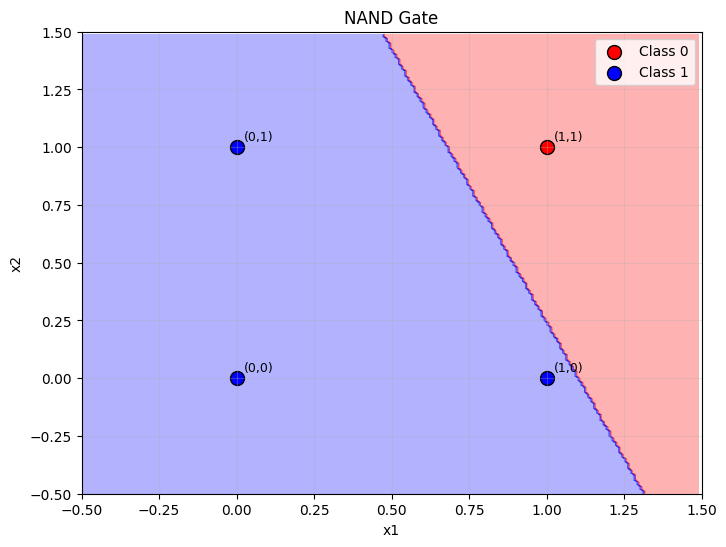

NAND Gate Results:
Input: [0 0] -> Expected: 1, Predicted: 1
Input: [0 1] -> Expected: 1, Predicted: 1
Input: [1 0] -> Expected: 1, Predicted: 1
Input: [1 1] -> Expected: 0, Predicted: 0
Weights: [ 0.25808361 -0.23382385 -0.09888499]


In [20]:
# NAND Gate
print("Training NAND Gate...")
nand_model = Perceptron()
nand_model.fit(X, y_nand)

plot_boundary(X, y_nand, nand_model, "NAND")

predictions = nand_model.predict(X)
print("NAND Gate Results:")
for i in range(len(X)):
    print(f"Input: {X[i]} -> Expected: {y_nand[i]}, Predicted: {predictions[i]}")

print(f"Weights: {nand_model.weights}")

Training NOR Gate...
Converged in 7 iterations


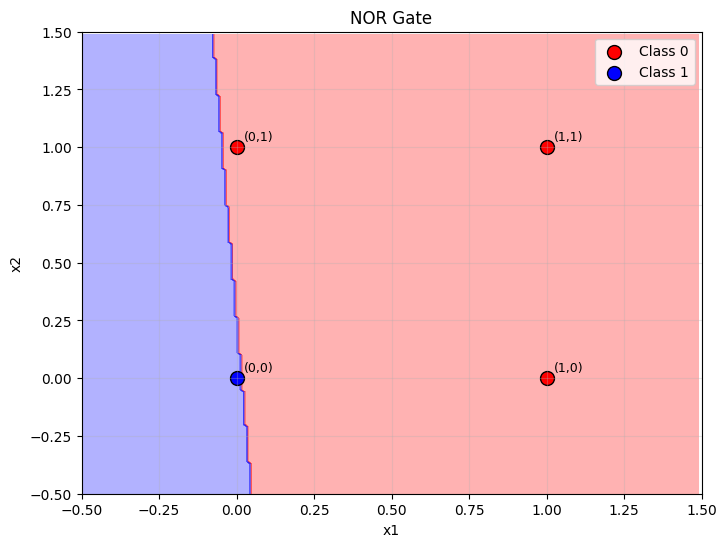

NOR Gate Results:
Input: [0 0] -> Expected: 1, Predicted: 1
Input: [0 1] -> Expected: 0, Predicted: 0
Input: [1 0] -> Expected: 0, Predicted: 0
Input: [1 1] -> Expected: 0, Predicted: 0
Weights: [ 0.00807258 -0.47941551 -0.03009015]


In [21]:
# NOR Gate  
print("Training NOR Gate...")
nor_model = Perceptron()
nor_model.fit(X, y_nor)

plot_boundary(X, y_nor, nor_model, "NOR")

predictions = nor_model.predict(X)
print("NOR Gate Results:")
for i in range(len(X)):
    print(f"Input: {X[i]} -> Expected: {y_nor[i]}, Predicted: {predictions[i]}")

print(f"Weights: {nor_model.weights}")

### Task # 02

In [22]:
# XOR gate using combination of perceptrons
# XOR = (A OR B) AND NOT(A AND B) = (A OR B) AND (A NAND B)

class XORPerceptron:
    def __init__(self):
        self.or_gate = None
        self.nand_gate = None
        self.and_gate = None
        
    def fit(self, X, y):
        # XOR truth table
        y_xor = np.array([0, 1, 1, 0])
        
        # Train OR gate (first layer)
        self.or_gate = Perceptron()
        self.or_gate.fit(X, y_or)
        
        # Train NAND gate (first layer) 
        self.nand_gate = Perceptron()
        self.nand_gate.fit(X, y_nand)
        
        # Create inputs for second layer (outputs of OR and NAND)
        or_outputs = self.or_gate.predict(X)
        nand_outputs = self.nand_gate.predict(X)
        layer2_inputs = np.column_stack([or_outputs, nand_outputs])
        
        # Train AND gate for second layer
        self.and_gate = Perceptron()
        self.and_gate.fit(layer2_inputs, y_xor)
        
        print("XOR network trained successfully!")
        
    def predict(self, X):
        # Get outputs from first layer
        or_outputs = self.or_gate.predict(X)
        nand_outputs = self.nand_gate.predict(X)
        
        # Combine outputs for second layer
        layer2_inputs = np.column_stack([or_outputs, nand_outputs])
        
        # Final prediction from AND gate
        return self.and_gate.predict(layer2_inputs)

# XOR truth table
y_xor = np.array([0, 1, 1, 0])
print("XOR truth table:", y_xor)

XOR truth table: [0 1 1 0]


In [23]:
# Train XOR gate
print("Training XOR Gate...")
xor_model = XORPerceptron()
xor_model.fit(X, y_xor)

# Test the XOR model
predictions = xor_model.predict(X)
print("XOR Gate Results:")
for i in range(len(X)):
    print(f"Input: {X[i]} -> Expected: {y_xor[i]}, Predicted: {predictions[i]}")

# Check accuracy
accuracy = np.mean(predictions == y_xor) * 100
print(f"XOR Accuracy: {accuracy:.1f}%")

Training XOR Gate...
Converged in 11 iterations
Converged in 7 iterations
Converged in 6 iterations
XOR network trained successfully!
XOR Gate Results:
Input: [0 0] -> Expected: 0, Predicted: 0
Input: [0 1] -> Expected: 1, Predicted: 1
Input: [1 0] -> Expected: 1, Predicted: 1
Input: [1 1] -> Expected: 0, Predicted: 0
XOR Accuracy: 100.0%


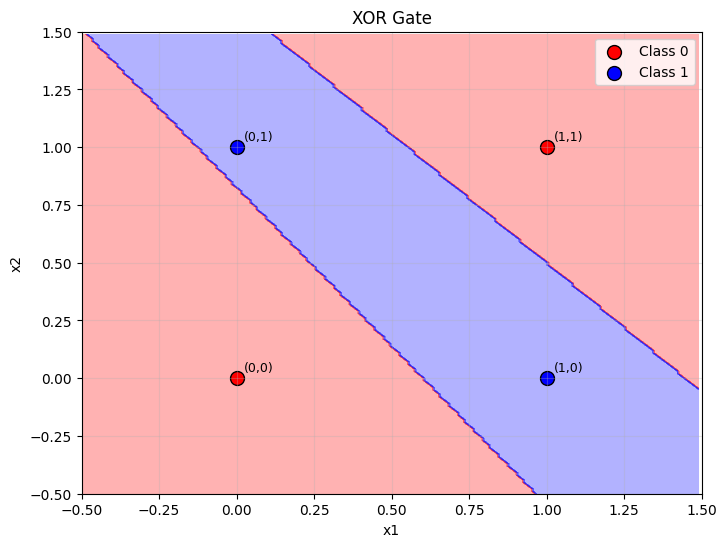


Intermediate gate outputs:
Input | OR | NAND | XOR
-------------------------
[0 0] | 0  |  1   | 0
[0 1] | 1  |  1   | 1
[1 0] | 1  |  1   | 1
[1 1] | 1  |  0   | 0

XOR = (A OR B) AND (A NAND B)


In [24]:
# Plot XOR decision boundary (similar to other gates)
plot_boundary(X, y_xor, xor_model, "XOR")

# Show the intermediate outputs
print("\nIntermediate gate outputs:")
or_out = xor_model.or_gate.predict(X)
nand_out = xor_model.nand_gate.predict(X)

print("Input | OR | NAND | XOR")
print("-" * 25)
for i in range(len(X)):
    print(f"{X[i]} | {or_out[i]}  |  {nand_out[i]}   | {predictions[i]}")

print(f"\nXOR = (A OR B) AND (A NAND B)")

In [25]:
# Compare: Single perceptron vs Multi-layer for XOR
print("Trying single perceptron on XOR:")
single_xor = Perceptron()
single_xor.fit(X, y_xor)

single_pred = single_xor.predict(X)
print("Single perceptron XOR results:")
for i in range(len(X)):
    print(f"{X[i]} -> {single_pred[i]} (expected {y_xor[i]})")

accuracy = np.mean(single_pred == y_xor) * 100
print(f"Accuracy: {accuracy}%")
print("Single perceptron can't solve XOR!")

Trying single perceptron on XOR:
Single perceptron XOR results:
[0 0] -> 1 (expected 0)
[0 1] -> 1 (expected 1)
[1 0] -> 0 (expected 1)
[1 1] -> 0 (expected 0)
Accuracy: 50.0%
Single perceptron can't solve XOR!
